In [1]:
#Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout ,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import sklearn

import tensorflow as tensor
from tensorflow.keras import layers
import tensorflow as tf


import cv2
import os
import random
import pickle

import numpy as np


creating a path to dataset

In [4]:
data_dir = '/Users/Srushti/Documents/Verzeo/SrushtiShah-AgeingSign-Batch3/SignsAge/verzeo_ageing_dataset'
labels = ['darkspots', 'puffy eyes','wrinkles'] 
for label in labels: 
    path = os.path.join(data_dir, label)
    print(path)
            

/Users/Srushti/Documents/Verzeo/SrushtiShah-AgeingSign-Batch3/SignsAge/verzeo_ageing_dataset/darkspots
/Users/Srushti/Documents/Verzeo/SrushtiShah-AgeingSign-Batch3/SignsAge/verzeo_ageing_dataset/puffy eyes
/Users/Srushti/Documents/Verzeo/SrushtiShah-AgeingSign-Batch3/SignsAge/verzeo_ageing_dataset/wrinkles


In [5]:
for label in labels: 
    path = os.path.join(data_dir, label)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        print(img_path)
        break
            

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Srushti/Documents/Verzeo/SrushtiShah-AgeingSign-Batch3/SignsAge/verzeo_ageing_dataset/darkspots'

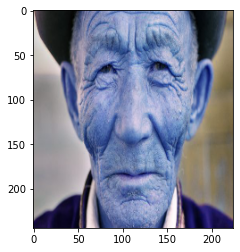

In [4]:
#loading the dat
for label in labels: 
    path = os.path.join(data_dir, label)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (224,244))
        plt.imshow(img_arr)
        break
        

In [5]:
IMG_SIZE = (224,244,3)
batch_size=30
tf.compat.v1.disable_eager_execution()

In [6]:
data=[]
for label in labels: 
    path = os.path.join(data_dir, label)
    label=labels.index(label)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (224,244))
        data.append([img_arr, label])
    

In [7]:
len(data)

726

In [8]:
random.shuffle(data)

In [9]:
data
print('Array of Data:',data)


Array of Data: [[array([[[ 62,  63,  73],
        [ 63,  64,  74],
        [ 64,  65,  75],
        ...,
        [ 73,  75,  83],
        [ 71,  73,  81],
        [ 70,  72,  80]],

       [[ 62,  63,  73],
        [ 63,  64,  74],
        [ 64,  65,  75],
        ...,
        [ 73,  75,  83],
        [ 70,  72,  80],
        [ 69,  71,  79]],

       [[ 62,  63,  73],
        [ 63,  64,  74],
        [ 64,  65,  75],
        ...,
        [ 72,  74,  82],
        [ 70,  72,  80],
        [ 69,  71,  79]],

       ...,

       [[170, 184, 206],
        [169, 182, 204],
        [167, 179, 203],
        ...,
        [ 20,  14,  32],
        [ 14,  12,  34],
        [ 14,  12,  33]],

       [[169, 182, 205],
        [168, 180, 204],
        [166, 178, 202],
        ...,
        [ 16,  11,  30],
        [ 20,  18,  40],
        [ 23,  21,  43]],

       [[168, 180, 204],
        [167, 179, 203],
        [165, 177, 201],
        ...,
        [ 19,  14,  33],
        [ 31,  29,  51],
       

In [10]:
data[0]
print('Array of Darkspots on faces:',data[0])

Array of Darkspots on faces: [array([[[ 62,  63,  73],
        [ 63,  64,  74],
        [ 64,  65,  75],
        ...,
        [ 73,  75,  83],
        [ 71,  73,  81],
        [ 70,  72,  80]],

       [[ 62,  63,  73],
        [ 63,  64,  74],
        [ 64,  65,  75],
        ...,
        [ 73,  75,  83],
        [ 70,  72,  80],
        [ 69,  71,  79]],

       [[ 62,  63,  73],
        [ 63,  64,  74],
        [ 64,  65,  75],
        ...,
        [ 72,  74,  82],
        [ 70,  72,  80],
        [ 69,  71,  79]],

       ...,

       [[170, 184, 206],
        [169, 182, 204],
        [167, 179, 203],
        ...,
        [ 20,  14,  32],
        [ 14,  12,  34],
        [ 14,  12,  33]],

       [[169, 182, 205],
        [168, 180, 204],
        [166, 178, 202],
        ...,
        [ 16,  11,  30],
        [ 20,  18,  40],
        [ 23,  21,  43]],

       [[168, 180, 204],
        [167, 179, 203],
        [165, 177, 201],
        ...,
        [ 19,  14,  33],
        [ 31,  29, 

In [11]:
data[1]
print('Array of Puffy eyes:',data[1])

Array of Puffy eyes: [array([[[178, 187, 224],
        [180, 189, 225],
        [181, 190, 224],
        ...,
        [196, 207, 241],
        [196, 206, 240],
        [196, 206, 240]],

       [[175, 184, 221],
        [179, 188, 224],
        [182, 191, 225],
        ...,
        [197, 208, 242],
        [198, 208, 242],
        [198, 208, 242]],

       [[171, 180, 217],
        [177, 187, 223],
        [183, 192, 226],
        ...,
        [198, 209, 243],
        [200, 210, 244],
        [200, 210, 244]],

       ...,

       [[237, 238, 248],
        [237, 238, 248],
        [238, 239, 249],
        ...,
        [215, 220, 250],
        [211, 219, 251],
        [211, 219, 251]],

       [[237, 238, 248],
        [237, 238, 248],
        [238, 239, 249],
        ...,
        [215, 220, 250],
        [211, 218, 251],
        [211, 218, 251]],

       [[237, 238, 248],
        [237, 238, 248],
        [238, 239, 249],
        ...,
        [215, 220, 250],
        [211, 218, 251],
  

In [12]:
data[2]
print('Array of wrinkels on face:',data[2])

Array of wrinkels on face: [array([[[243, 217, 200],
        [242, 216, 199],
        [253, 230, 213],
        ...,
        [241, 240, 242],
        [241, 240, 242],
        [241, 240, 242]],

       [[250, 224, 207],
        [244, 218, 201],
        [236, 211, 194],
        ...,
        [240, 239, 241],
        [240, 239, 241],
        [240, 239, 241]],

       [[240, 214, 197],
        [240, 214, 197],
        [224, 198, 181],
        ...,
        [240, 239, 241],
        [240, 239, 241],
        [240, 239, 241]],

       ...,

       [[123, 122, 138],
        [120, 120, 137],
        [111, 111, 130],
        ...,
        [167, 173, 194],
        [166, 171, 195],
        [165, 170, 195]],

       [[126, 126, 142],
        [121, 121, 138],
        [113, 114, 133],
        ...,
        [167, 174, 195],
        [166, 171, 196],
        [165, 170, 195]],

       [[127, 126, 142],
        [121, 121, 138],
        [113, 114, 133],
        ...,
        [167, 174, 195],
        [166, 172, 19

Text(0.5, 1.0, 'wrinkles')

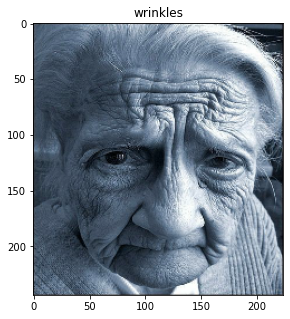

In [13]:
#plotting the images
plt.figure(figsize = (5,5))
plt.imshow(data[500][0])
plt.title(labels[data[700][-1]])

Text(0.5, 1.0, 'puffy eyes')

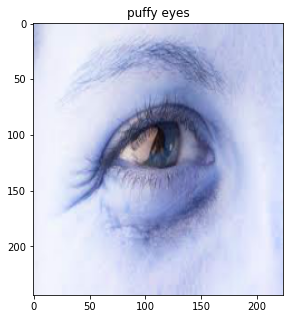

In [14]:
plt.figure(figsize = (5,5))
plt.imshow(data[1][0])
plt.title(labels[data[1][-1]])

Text(0.5, 1.0, 'puffy eyes')

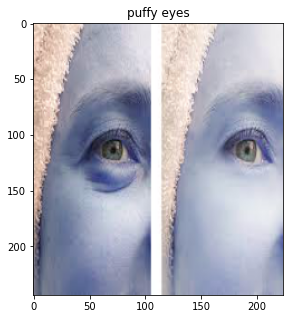

In [17]:
plt.figure(figsize = (5,5))
plt.imshow(data[2][0])
plt.title(labels[data[100][1]])

C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

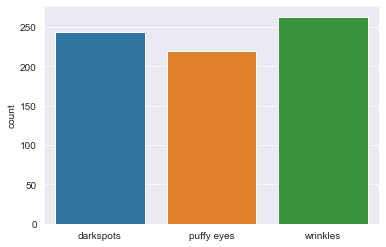

In [18]:
l = []
for i in data:
    if(i[1] == 0):
        l.append("darkspots")
    elif(i[1]== 1):
        l.append("puffy eyes")
    else:
        l.append("wrinkles")
sns.set_style('darkgrid')
sns.countplot(l)

In [19]:
#defining x and y data
x =[]
y =[]
for features, labels in data:
    x.append(features)
    y.append(labels)

In [20]:
x

[array([[[ 62,  63,  73],
         [ 63,  64,  74],
         [ 64,  65,  75],
         ...,
         [ 73,  75,  83],
         [ 71,  73,  81],
         [ 70,  72,  80]],
 
        [[ 62,  63,  73],
         [ 63,  64,  74],
         [ 64,  65,  75],
         ...,
         [ 73,  75,  83],
         [ 70,  72,  80],
         [ 69,  71,  79]],
 
        [[ 62,  63,  73],
         [ 63,  64,  74],
         [ 64,  65,  75],
         ...,
         [ 72,  74,  82],
         [ 70,  72,  80],
         [ 69,  71,  79]],
 
        ...,
 
        [[170, 184, 206],
         [169, 182, 204],
         [167, 179, 203],
         ...,
         [ 20,  14,  32],
         [ 14,  12,  34],
         [ 14,  12,  33]],
 
        [[169, 182, 205],
         [168, 180, 204],
         [166, 178, 202],
         ...,
         [ 16,  11,  30],
         [ 20,  18,  40],
         [ 23,  21,  43]],
 
        [[168, 180, 204],
         [167, 179, 203],
         [165, 177, 201],
         ...,
         [ 19,  14,  33],
  

In [21]:
y

[0,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [22]:
x = np.array(x,dtype='object')
y = np.array(y,dtype='object')

In [23]:
pickle_out = open('x','wb')
pickle.dump(x,pickle_out)
pickle_out.close()
pickle_out = open('y','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [24]:
X=pickle.load(open('x','rb'))
Y=pickle.load(open('y','rb'))

In [25]:
x

array([[[[62, 63, 73],
         [63, 64, 74],
         [64, 65, 75],
         ...,
         [73, 75, 83],
         [71, 73, 81],
         [70, 72, 80]],

        [[62, 63, 73],
         [63, 64, 74],
         [64, 65, 75],
         ...,
         [73, 75, 83],
         [70, 72, 80],
         [69, 71, 79]],

        [[62, 63, 73],
         [63, 64, 74],
         [64, 65, 75],
         ...,
         [72, 74, 82],
         [70, 72, 80],
         [69, 71, 79]],

        ...,

        [[170, 184, 206],
         [169, 182, 204],
         [167, 179, 203],
         ...,
         [20, 14, 32],
         [14, 12, 34],
         [14, 12, 33]],

        [[169, 182, 205],
         [168, 180, 204],
         [166, 178, 202],
         ...,
         [16, 11, 30],
         [20, 18, 40],
         [23, 21, 43]],

        [[168, 180, 204],
         [167, 179, 203],
         [165, 177, 201],
         ...,
         [19, 14, 33],
         [31, 29, 51],
         [37, 35, 57]]],


       [[[178, 187, 224],
       

In [26]:
y

array([0, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1,
       2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 2, 1, 1,
       2, 0, 0, 1, 2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 2,
       2, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0,
       0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 2, 0,
       0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0,
       1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0,

In [27]:
X=X/255
X

array([[[[0.24313725490196078, 0.24705882352941178,
          0.28627450980392155],
         [0.24705882352941178, 0.25098039215686274, 0.2901960784313726],
         [0.25098039215686274, 0.2549019607843137, 0.29411764705882354],
         ...,
         [0.28627450980392155, 0.29411764705882354, 0.3254901960784314],
         [0.2784313725490196, 0.28627450980392155, 0.3176470588235294],
         [0.27450980392156865, 0.2823529411764706, 0.3137254901960784]],

        [[0.24313725490196078, 0.24705882352941178,
          0.28627450980392155],
         [0.24705882352941178, 0.25098039215686274, 0.2901960784313726],
         [0.25098039215686274, 0.2549019607843137, 0.29411764705882354],
         ...,
         [0.28627450980392155, 0.29411764705882354, 0.3254901960784314],
         [0.27450980392156865, 0.2823529411764706, 0.3137254901960784],
         [0.27058823529411763, 0.2784313725490196, 0.30980392156862746]],

        [[0.24313725490196078, 0.24705882352941178,
          0.286274509

In [28]:
#definig the train and test
import tensorflow as tf
train = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224,244),
  batch_size=batch_size)

test = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 244),
  batch_size=batch_size)



Found 719 files belonging to 3 classes.
Using 576 files for training.
Found 719 files belonging to 3 classes.
Using 143 files for validation.


In [29]:
class_names = train.class_names
print(class_names)


['darkspots', 'puffy eyes', 'wrinkles']


In [30]:
#Normalization of data
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [31]:
#splitting test and train
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size =0.3,random_state=101)

In [32]:
print((X_train.shape,Y_train.shape))
print((X_test.shape,Y_test.shape))



((508, 244, 224, 3), (508,))
((218, 244, 224, 3), (218,))


In [33]:
#image generator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)
datagen.fit(X_test)

In [34]:
from tensorflow.keras.layers.experimental import preprocessing
data_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="data_augmentation",
)


In [35]:
from tensorflow.keras.applications import EfficientNetB0
tf.compat.v1.disable_eager_execution()

In [36]:
conv_base=EfficientNetB0(weights="imagenet",include_top=False,input_shape=(244,224,3))
model=Sequential()
model.add(conv_base)
model.add(MaxPool2D((3,3)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(3,activation="sigmoid"))

In [37]:
#model compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [41]:
history=model.fit(datagen.flow(X_train,Y_train,batch_size=30),validation_data=(X_test,Y_test),epochs=30)

Epoch 1/30
17/17 [==============================] - 158s 9s/step - batch: 8.0000 - size: 29.8824 - loss: 0.6294 - accuracy: 0.9213 - val_loss: 0.6673 - val_accuracy: 0.8761
Epoch 2/30
17/17 [==============================] - 162s 10s/step - batch: 8.0000 - size: 29.8824 - loss: 0.6317 - accuracy: 0.9252 - val_loss: 0.6763 - val_accuracy: 0.8303
Epoch 3/30
17/17 [==============================] - 221s 13s/step - batch: 8.0000 - size: 29.8824 - loss: 0.6153 - accuracy: 0.9252 - val_loss: 0.6832 - val_accuracy: 0.8532
Epoch 4/30
17/17 [==============================] - 254s 15s/step - batch: 8.0000 - size: 29.8824 - loss: 0.6101 - accuracy: 0.9350 - val_loss: 0.6672 - val_accuracy: 0.8945
Epoch 5/30
17/17 [==============================] - 158s 9s/step - batch: 8.0000 - size: 29.8824 - loss: 0.6210 - accuracy: 0.9154 - val_loss: 0.7109 - val_accuracy: 0.8119
Epoch 6/30
17/17 [==============================] - 160s 9s/step - batch: 8.0000 - size: 29.8824 - loss: 0.6449 - accuracy: 0.9075 -

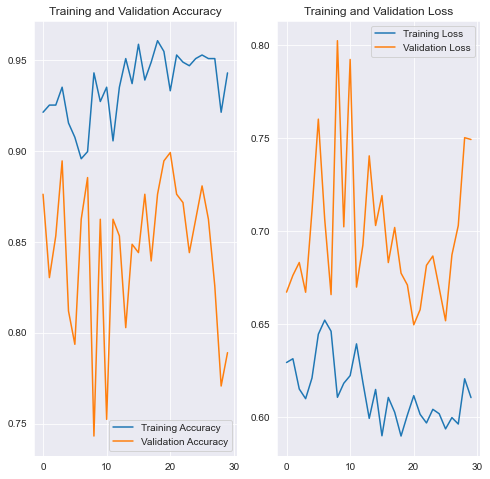

In [44]:
#Plotting Training loss and accuracy
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [48]:
from keras.models import model_from_json

In [49]:
model_json=model.to_json()
with open("SignsAge.json","w") as abc:
    abc.write(model_json)
    abc.close()
model.save_weights("SignsAge.h5")
print("Save the Model")

Save the Model


In [50]:
json_file=open("SignsAge.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("SignsAge.h5")
print("Loaded Model Sucesssfully")

Loaded Model Sucesssfully


In [51]:
def getClassName(classNo):
    if   classNo == 0: return 'With dark spots'
    elif classNo == 1: return 'With puffy eyes'
    elif classno == 2: return 'With wrinkles '
    